# Face tracking pipeline

The following example illustrates how to use the `facenet_pytorch` python package to perform face detection and tracking on an image dataset using MTCNN.

In [1]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

#### Determine if an nvidia GPU is available

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


#### Define MTCNN module

Note that, since MTCNN is a collection of neural nets and other code, the device must be passed in the following way to enable copying of objects when needed internally.

See `help(MTCNN)` for more details.

In [3]:
mtcnn = MTCNN(keep_all=True, device=device)

#### Get a sample video

We begin by loading a video with some faces in it. The `mmcv` PyPI package by mmlabs is used to read the video frames (it can be installed with `pip install mmcv`). Frames are then converted to PIL images.

In [4]:
video = mmcv.VideoReader('../data/people_walking.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

#### Run video through MTCNN

We iterate through each frame, detect faces, and draw their bounding boxes on the video frames.

In [8]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}/{}'.format(i + 1, len(frames)), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    try:
        for box in boxes:
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
        # Add to frame list
        frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
    except:
        print(' - Corrupted frame. Continuing...')
        continue
print('\nDone')

Tracking frame: 238/3493 - Corrupted frame. Continuing...
Tracking frame: 239/3493 - Corrupted frame. Continuing...
Tracking frame: 240/3493 - Corrupted frame. Continuing...
Tracking frame: 1092/3493 - Corrupted frame. Continuing...
Tracking frame: 1095/3493 - Corrupted frame. Continuing...
Tracking frame: 1096/3493 - Corrupted frame. Continuing...
Tracking frame: 1097/3493 - Corrupted frame. Continuing...
Tracking frame: 1104/3493 - Corrupted frame. Continuing...
Tracking frame: 1105/3493 - Corrupted frame. Continuing...
Tracking frame: 1292/3493 - Corrupted frame. Continuing...
Tracking frame: 1604/3493 - Corrupted frame. Continuing...
Tracking frame: 1608/3493 - Corrupted frame. Continuing...
Tracking frame: 1609/3493 - Corrupted frame. Continuing...
Tracking frame: 1610/3493 - Corrupted frame. Continuing...
Tracking frame: 1612/3493 - Corrupted frame. Continuing...
Tracking frame: 1614/3493 - Corrupted frame. Continuing...
Tracking frame: 1714/3493 - Corrupted frame. Continuing...


Tracking frame: 2843/3493 - Corrupted frame. Continuing...
Tracking frame: 2845/3493 - Corrupted frame. Continuing...
Tracking frame: 2846/3493 - Corrupted frame. Continuing...
Tracking frame: 2847/3493 - Corrupted frame. Continuing...
Tracking frame: 2848/3493 - Corrupted frame. Continuing...
Tracking frame: 2849/3493 - Corrupted frame. Continuing...
Tracking frame: 2850/3493 - Corrupted frame. Continuing...
Tracking frame: 2851/3493 - Corrupted frame. Continuing...
Tracking frame: 2852/3493 - Corrupted frame. Continuing...
Tracking frame: 2854/3493 - Corrupted frame. Continuing...
Tracking frame: 2858/3493 - Corrupted frame. Continuing...
Tracking frame: 2866/3493 - Corrupted frame. Continuing...
Tracking frame: 2867/3493 - Corrupted frame. Continuing...
Tracking frame: 2871/3493 - Corrupted frame. Continuing...
Tracking frame: 2872/3493 - Corrupted frame. Continuing...
Tracking frame: 2982/3493 - Corrupted frame. Continuing...
Tracking frame: 2983/3493 - Corrupted frame. Continuing.

Tracking frame: 3456/3493 - Corrupted frame. Continuing...
Tracking frame: 3457/3493 - Corrupted frame. Continuing...
Tracking frame: 3458/3493 - Corrupted frame. Continuing...
Tracking frame: 3459/3493 - Corrupted frame. Continuing...
Tracking frame: 3460/3493 - Corrupted frame. Continuing...
Tracking frame: 3461/3493 - Corrupted frame. Continuing...
Tracking frame: 3462/3493 - Corrupted frame. Continuing...
Tracking frame: 3463/3493 - Corrupted frame. Continuing...
Tracking frame: 3464/3493 - Corrupted frame. Continuing...
Tracking frame: 3465/3493 - Corrupted frame. Continuing...
Tracking frame: 3466/3493 - Corrupted frame. Continuing...
Tracking frame: 3467/3493 - Corrupted frame. Continuing...
Tracking frame: 3468/3493 - Corrupted frame. Continuing...
Tracking frame: 3469/3493 - Corrupted frame. Continuing...
Tracking frame: 3470/3493 - Corrupted frame. Continuing...
Tracking frame: 3471/3493 - Corrupted frame. Continuing...
Tracking frame: 3472/3493 - Corrupted frame. Continuing.

#### Display detections

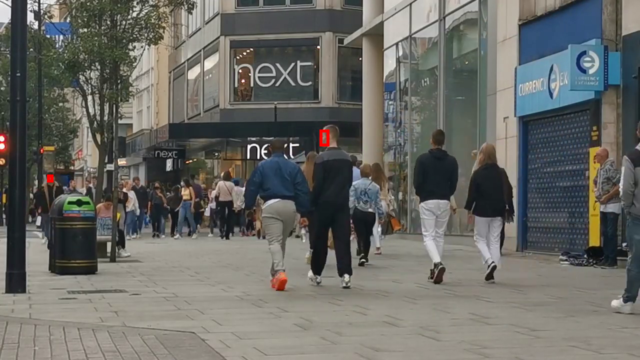

In [8]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

#### Save tracked video

In [9]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('facenet_sample.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()